# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


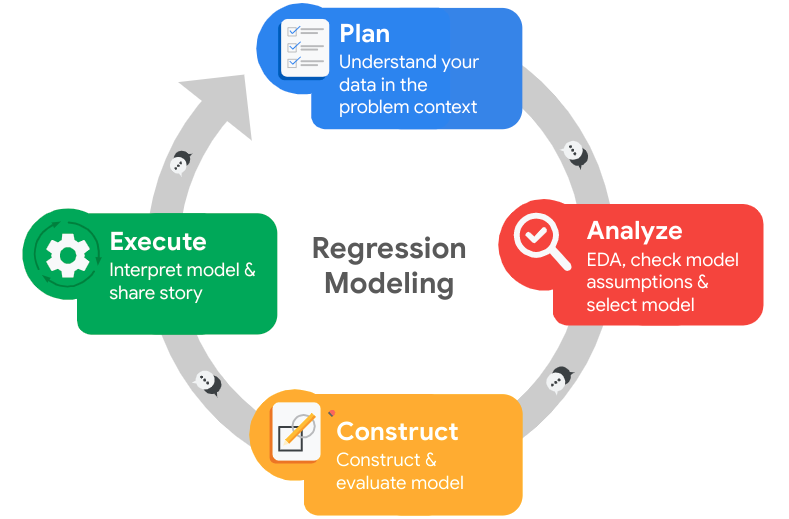

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Just copy paste imports from exemplar file to not bother too much with it 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
# file name changed because working with locally downloaded file 
df0 = pd.read_csv("HR_comma_sep.csv")


# Display first few rows of the dataframe
df0.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


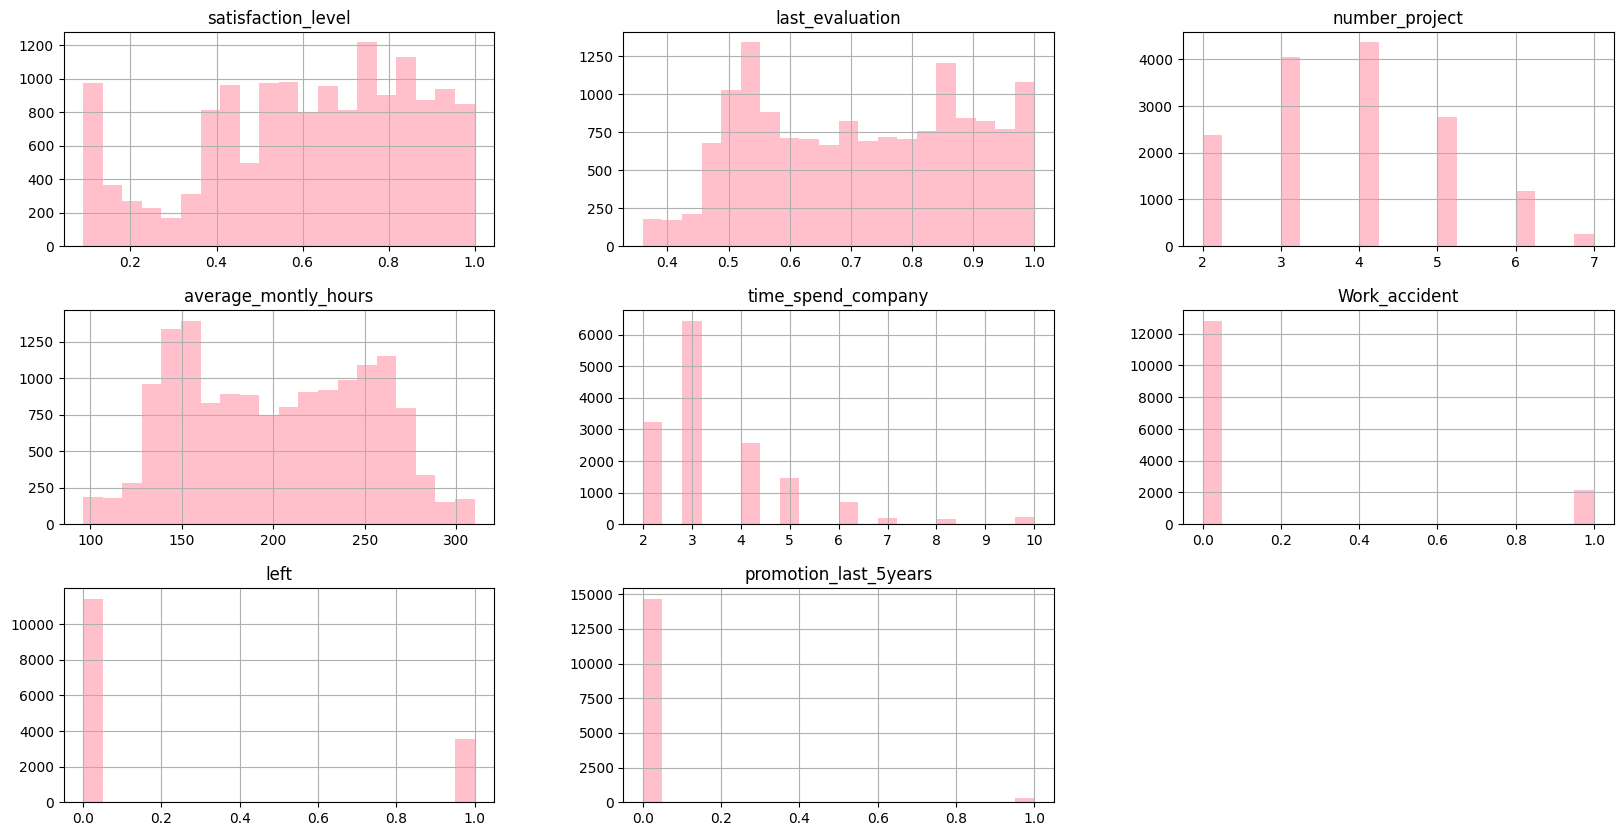

In [5]:
df0.hist(bins=20, figsize=(20,10), color='pink')
plt.show()

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.columns = df0.columns.str.lower()

# Display all column names after the update
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours'})

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep=False)].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<Axes: xlabel='time_spend_company'>

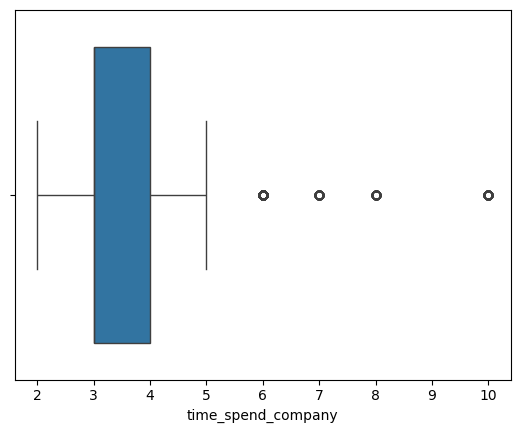

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df1, x = 'time_spend_company')


In [13]:
# Determine the number of rows containing outliers
q3 = df1['time_spend_company'].quantile(0.75)
q1 = df1['time_spend_company'].quantile(0.25)
iqr = q3 - q1
upper_limit = q3+ 1.5 *iqr
lower_limit = q1 - 1.5 * iqr
print("Outliers above upper_limit",(df1['time_spend_company'] > upper_limit).sum())
print("Outliers belowe lower_limit",(df1['time_spend_company'] < lower_limit).sum())
print("Lower bound",lower_limit)
print(df1['time_spend_company'].unique())


Outliers above upper_limit 824
Outliers belowe lower_limit 0
Lower bound 1.5
[ 3  6  4  5  2  8 10  7]


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


We have 83% of negative values in column that we want to predict. It's worth to note that in this case we have to be extra careful to not create model with almost all predctions negative. That model would be stil pretty accurate (0,83 accuracy) but that's not we are looking for as main concerne are these positive predictions(meaning employee will leave)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<Axes: xlabel='promotion_last_5years', ylabel='count'>

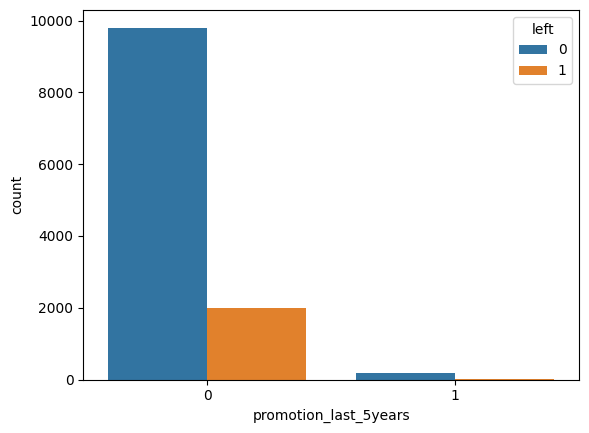

In [15]:
# Create a plot as needed
sns.countplot(data= df1,hue= 'left',x = 'promotion_last_5years')


<Axes: xlabel='number_project', ylabel='Count'>

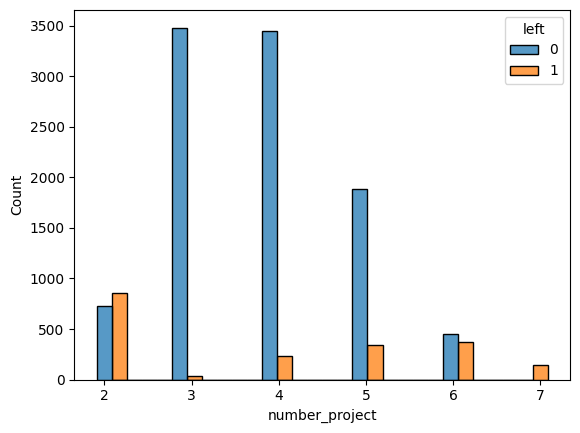

In [16]:
# Create a plot as needed
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2)


As in whole dataset only around 20% people are marked as ones who left, even split in groups that had 2 or 6 projects are interesting 

<Axes: xlabel='average_monthly_hours', ylabel='satisfaction_level'>

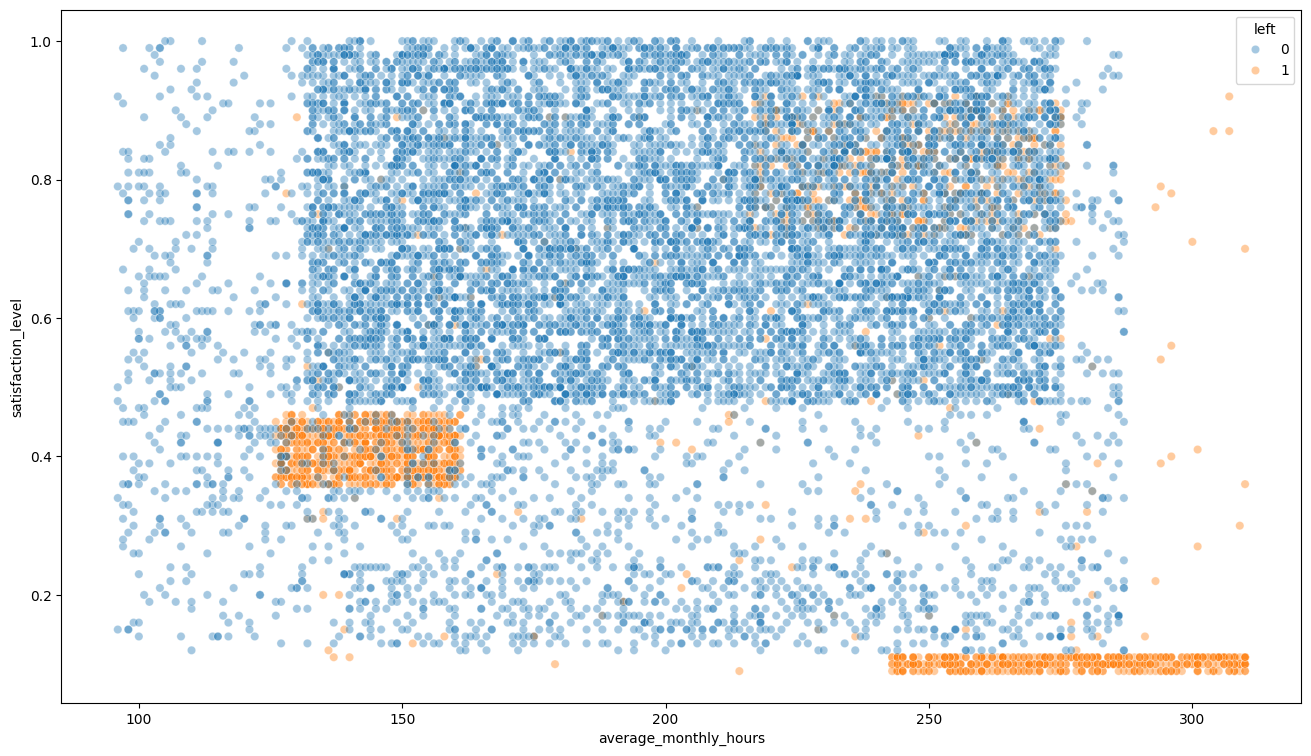

In [17]:
# Create a plot as needed
plt.figure(figsize=(16, 9))

sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)


<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

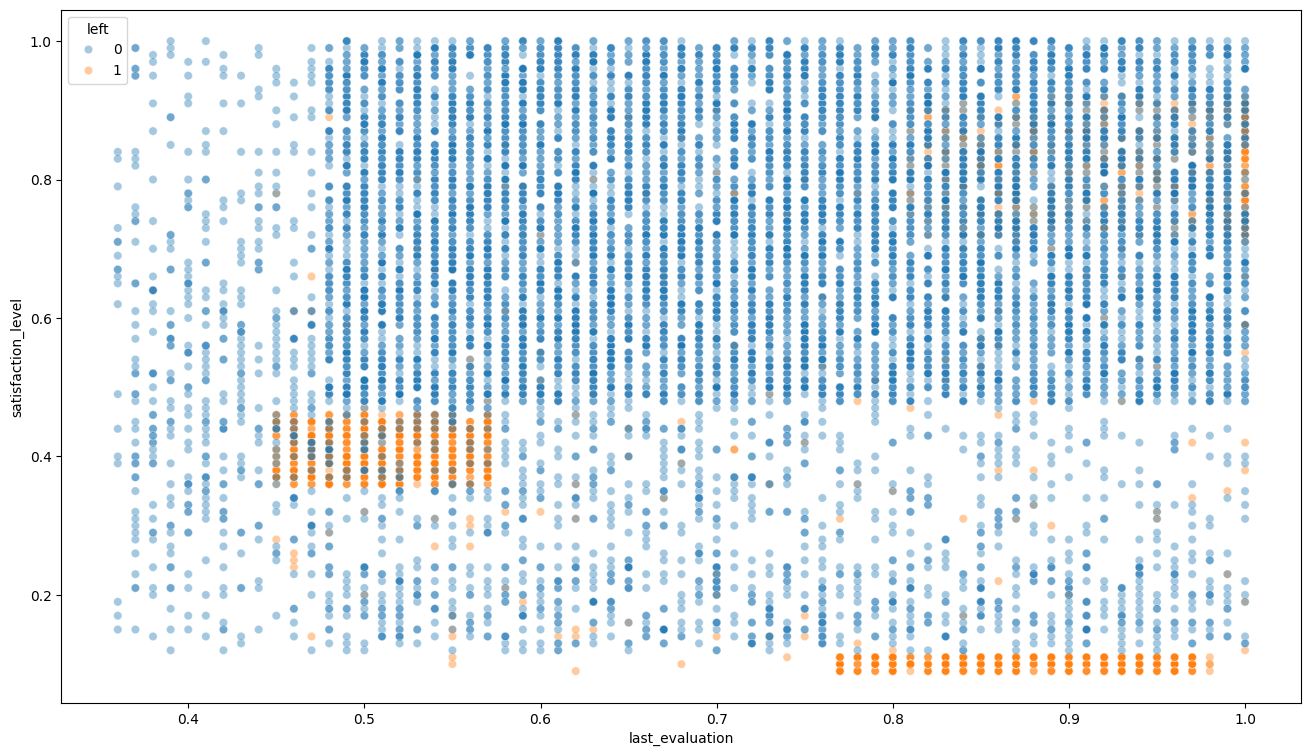

In [18]:
# Create a plot as needed
plt.figure(figsize=(16, 9))

sns.scatterplot(data=df1, x='last_evaluation', y='satisfaction_level', hue='left', alpha=0.4)

Many of this people who had low satisfaction level and left were evaluated quite high. What pitty that we lost them.

<Axes: xlabel='time_spend_company', ylabel='Count'>

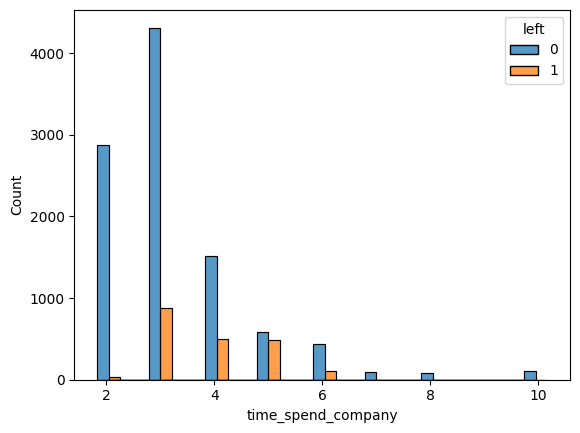

In [19]:
sns.histplot(data=df1, x='time_spend_company', hue='left', multiple='dodge', shrink=5)


In [20]:
# Create a plot as needed
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [21]:
# Create a plot as needed
df1.groupby(['left'])['last_evaluation'].agg(['mean','median'])

,mean,median
left,,
0,0.715667,0.71
1,0.721783,0.79


<Axes: xlabel='time_spend_company', ylabel='count'>

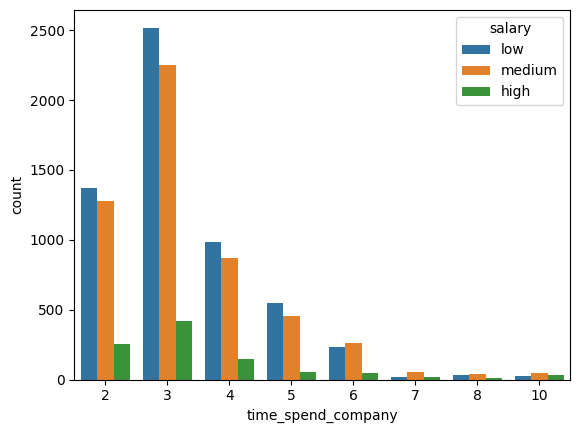

In [22]:
# Create a plot as needed
# satisfaction level against salary
sns.countplot(data=df1,x = "time_spend_company" , hue = 'salary' )

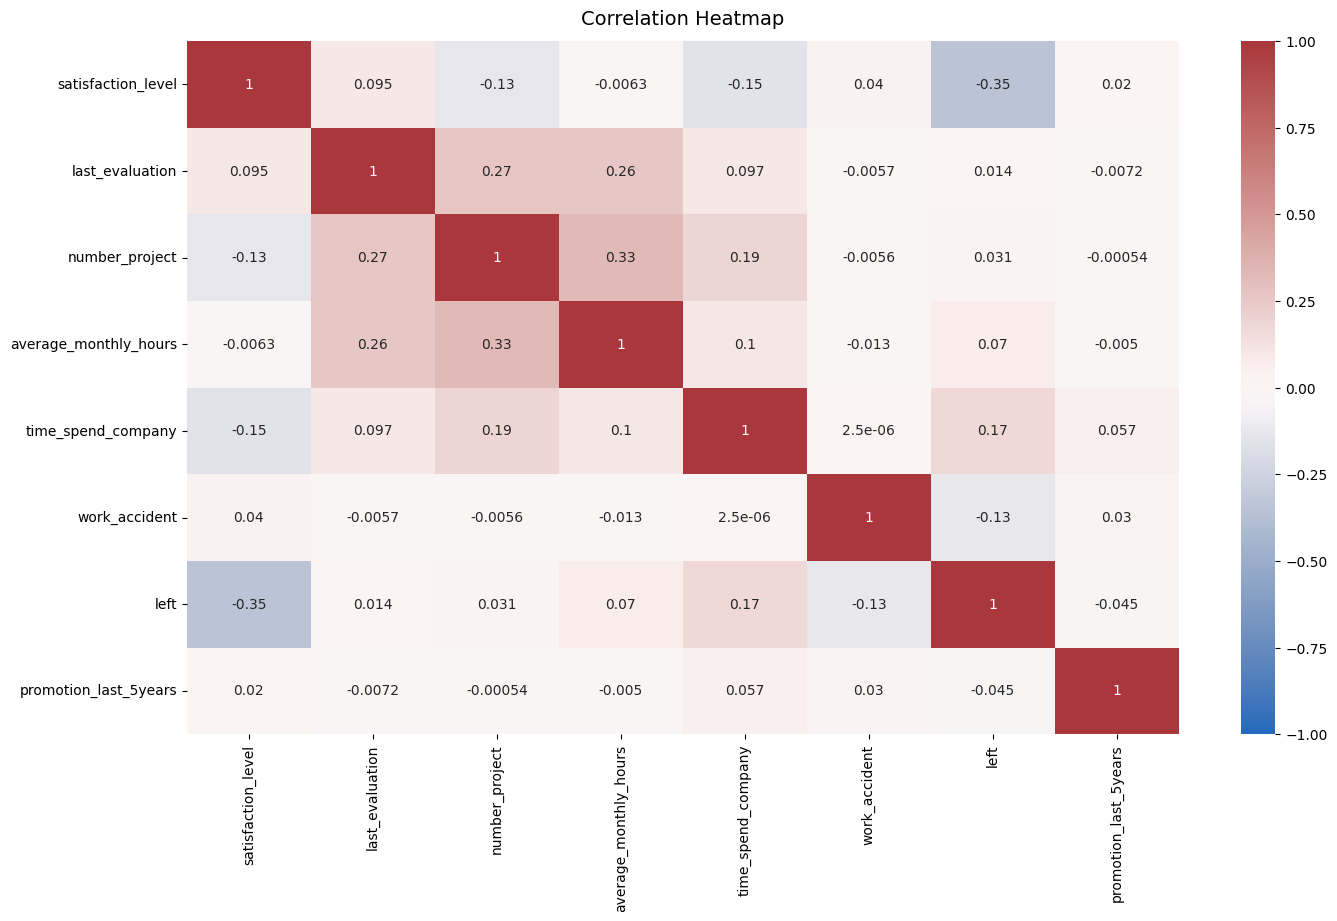

In [23]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

It seems that people who are leaving company are generally unsatisfied with work, they also tend to have huge amount of monthly hours. We can also notice extreme number of projects among people who left (2 and 6 where 2 is the lowest number and 6 is last number with many cases in database)

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It's a classification task as outcome variable is binary (we have to options left vs not left)

### Identify the types of models most appropriate for this task.

From the models mentioned in this course: logistic regression, tree based models (I would like to test there some from standard sklearn implementation vs catboost)

### Modeling

Add as many cells as you need to conduct the modeling process.

To begin let's build logistic regression!

In [24]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False,dtype='int')

# Display the new dataframe
df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


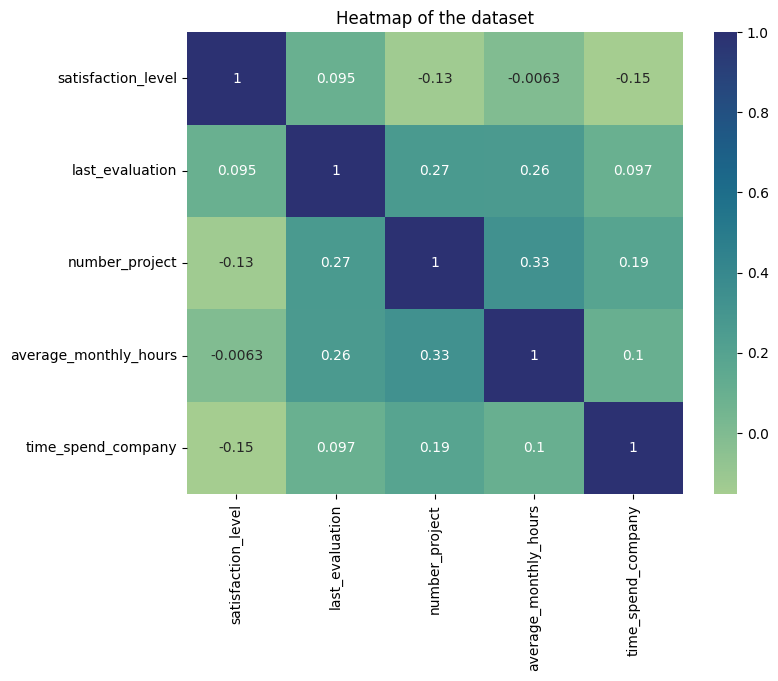

In [25]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [26]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['time_spend_company'] >= lower_limit) & (df_enc['time_spend_company'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
y = df_logreg['left']
X = df_logreg.drop(columns = 'left')

Let's standarize data to get better sense on which of independent variable are important for the outcome

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.25,stratify=y, random_state=120)

In [30]:
X_std.shape

(11167, 18)

In [31]:
lr = LogisticRegression(max_iter=1000) # in next step we'll proceed with class_weight balance model
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)



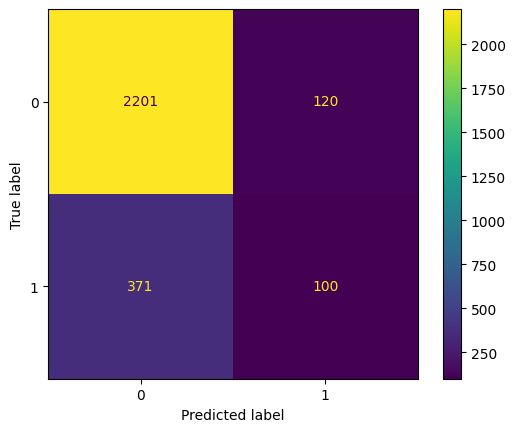

In [32]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  )

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [33]:
# basic metrics 
print("f1_score:",f1_score(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))


f1_score: 0.2894356005788712
accuracy: 0.8241404011461319
recall: 0.21231422505307856


In [34]:
lr = LogisticRegression(max_iter=1000,class_weight='balanced') # in next step we'll proceed with class_weight balance model
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)



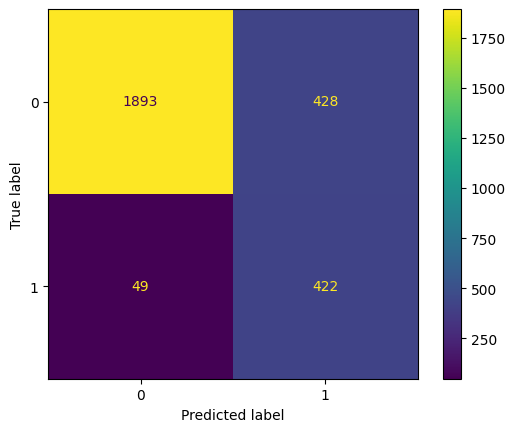

In [35]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  )

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [36]:
# basic metrics 
print("f1_score:",f1_score(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

f1_score: 0.6389099167297502
accuracy: 0.8291547277936963
recall: 0.8959660297239915


Balanced model is much better in our case. Now time to go to the forest :) But before that feature importance(coefficients) chart.

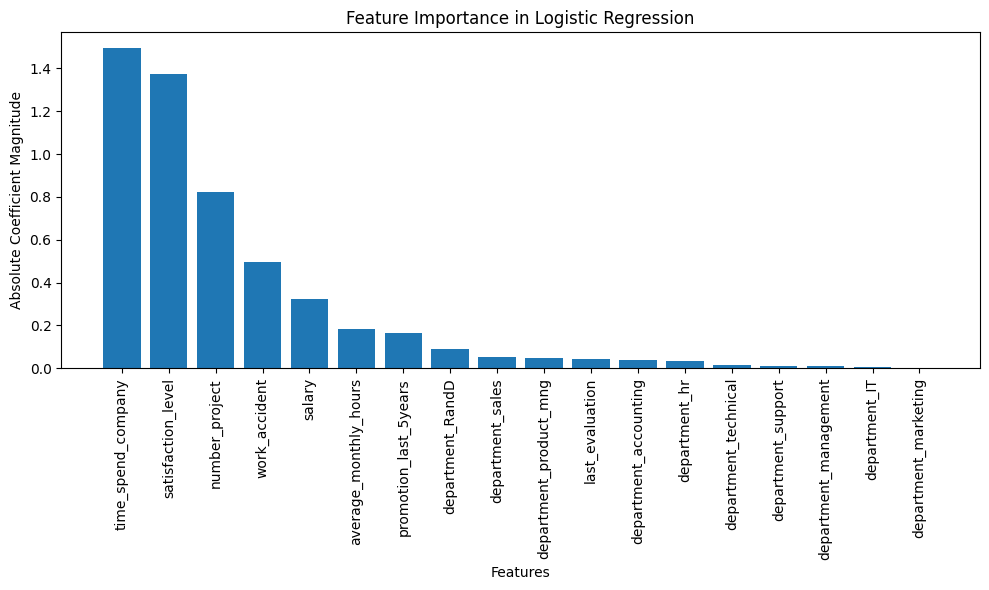

In [37]:
# Get feature importance
importance = np.abs(lr.coef_[0])
feature_names = X.columns

# Create a dataframe of feature names and their importance
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.tight_layout()
plt.show()

In [38]:
from catboost import CatBoostClassifier

All models based on trees don't need standarized data so we're training on base dataset

In [39]:
X =  df_enc.drop(columns='left')
y = df_enc['left']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y, random_state=120)

In [41]:
cb = CatBoostClassifier() # in next step we'll proceed with class_weight balance model
cb.fit(X_train,y_train)
y_pred = cb.predict(X_test)


Learning rate set to 0.026318
0:	learn: 0.6460093	total: 71.5ms	remaining: 1m 11s
1:	learn: 0.6020098	total: 75.9ms	remaining: 37.8s
2:	learn: 0.5625672	total: 79.8ms	remaining: 26.5s
3:	learn: 0.5257134	total: 83.5ms	remaining: 20.8s
4:	learn: 0.4897455	total: 87.6ms	remaining: 17.4s
5:	learn: 0.4575965	total: 91.6ms	remaining: 15.2s
6:	learn: 0.4282164	total: 96.5ms	remaining: 13.7s
7:	learn: 0.4008854	total: 101ms	remaining: 12.5s
8:	learn: 0.3770769	total: 104ms	remaining: 11.5s
9:	learn: 0.3555288	total: 109ms	remaining: 10.8s
10:	learn: 0.3359239	total: 112ms	remaining: 10.1s
11:	learn: 0.3177978	total: 116ms	remaining: 9.57s
12:	learn: 0.3006215	total: 120ms	remaining: 9.13s
13:	learn: 0.2861162	total: 124ms	remaining: 8.72s
14:	learn: 0.2724141	total: 128ms	remaining: 8.4s
15:	learn: 0.2591458	total: 132ms	remaining: 8.1s
16:	learn: 0.2476369	total: 136ms	remaining: 7.86s
17:	learn: 0.2371048	total: 140ms	remaining: 7.62s
18:	learn: 0.2272019	total: 144ms	remaining: 7.42s
19:	l

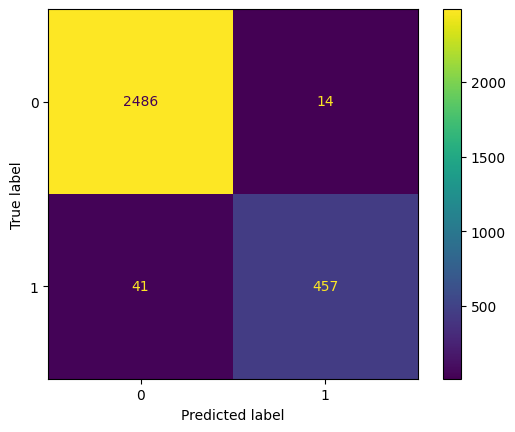

In [42]:
# Compute values for confusion matrix
cb_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
cb_disp = ConfusionMatrixDisplay(confusion_matrix=cb_cm, 
                                  )

# Plot confusion matrix
cb_disp.plot(values_format='')

# Display plot
plt.show()

In [43]:
# basic metrics 
print("f1_score:",f1_score(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))


f1_score: 0.9432404540763674
accuracy: 0.9816544362908606
recall: 0.9176706827309237


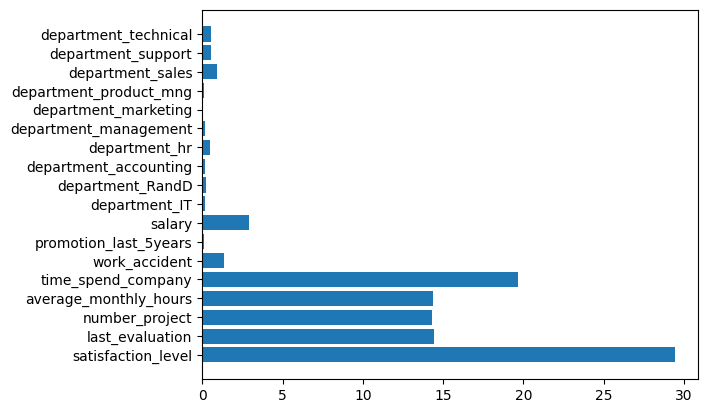

In [44]:
feature_importances2 = cb.feature_importances_

plt.barh(X.columns, feature_importances2)
plt.show()

Let's play a bit and try to train micrograd (basic implementation of nn by Andrej Karpathy)

In [45]:
from micrograd.engine import Value


In [46]:
from micrograd.engine import Value
from micrograd.nn import Neuron , Layer , MLP

In [47]:
X_std.shape

(11167, 18)

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [49]:
y = np.where(y == 0 , -1 , y)

In [50]:
y

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.25,stratify=y, random_state=120)

In [102]:
# definine our nn, we have 18 variables
# initialize a model \
model = MLP(2, [18, 18, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))


MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18), ReLUNeuron(18)], Layer of [LinearNeuron(18)]]
number of parameters 415


Basic loss function squared error 

In [101]:
# loss function, using simple squared erro
from math import sqrt
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X_train, y_train
    else:
        ri = np.random.permutation(X_train.shape[0])[:batch_size]
        Xb, yb = X_train[ri], y_train[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

# total_loss, acc = loss()
# print(total_loss, acc)

In [104]:
# training on batch size 300 due to optimalization problems 
for k in range(100):
    
    # forward
    total_loss, acc = loss(batch_size=300)
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.7854593512002483, accuracy 21.333333333333336%
step 1 loss 2.316062368217671, accuracy 83.66666666666667%
step 2 loss 0.5495194260681296, accuracy 80.33333333333333%
step 3 loss 0.35981347759649357, accuracy 87.0%
step 4 loss 0.37696181285737984, accuracy 85.66666666666667%
step 5 loss 0.40309263615373236, accuracy 86.0%
step 6 loss 0.37825304176950125, accuracy 88.0%
step 7 loss 0.44220053000505144, accuracy 82.33333333333334%
step 8 loss 0.48386007342175397, accuracy 83.33333333333334%
step 9 loss 0.41722161167915534, accuracy 85.0%
step 10 loss 0.3641005611637883, accuracy 85.0%
step 11 loss 0.37226156845953046, accuracy 84.66666666666667%
step 12 loss 0.337571968723618, accuracy 87.33333333333333%
step 13 loss 0.307902128851544, accuracy 87.66666666666667%
step 14 loss 0.3098025369306347, accuracy 88.0%
step 15 loss 0.36935007028596506, accuracy 82.33333333333334%
step 16 loss 0.3402369411119253, accuracy 87.0%
step 17 loss 0.3758184533493321, accuracy 83.0%
step 18 l

In [111]:
# Getting prediction 
inputs = [list(map(Value, xrow)) for xrow in X_test]
scores = list(map(model, inputs))


In [117]:
# mapping to -1,1
Z = np.array([s.data > 0 for s in scores])
y_pred = Z.astype(int)


In [122]:
np.unique(y_pred)

array([0, 1])

In [124]:
y_test = np.where(y_test<0 , 0 ,y_test)

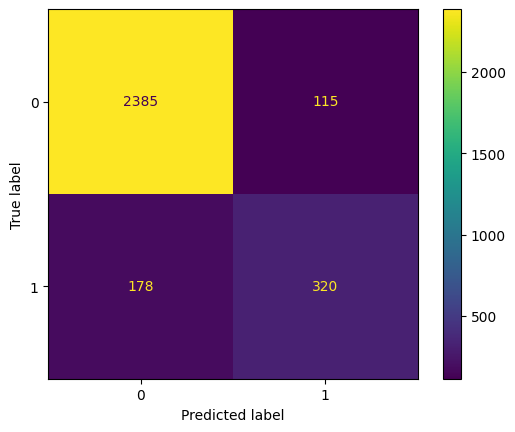

In [125]:
# Compute values for confusion matrix
cb_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
cb_disp = ConfusionMatrixDisplay(confusion_matrix=cb_cm, 
                                  )

# Plot confusion matrix
cb_disp.plot(values_format='')

# Display plot
plt.show()

In [126]:
# basic metrics 
print("f1_score:",f1_score(y_test,y_pred))
print("accuracy:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))


f1_score: 0.6859592711682744
accuracy: 0.9022681787858572
recall: 0.642570281124498


It definietly didn't perform as good as highly optimized gradient boosting based on random forrest implemented in catboost but it got better result than logistic regression even when trained on small bit of dataset. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Conclusion, Recommendations, Next Steps


The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.